# Logistic Regression

This function shows how to use TensorFlow to solve logistic regression.
$ \textbf{y} = sigmoid(\textbf{A}\times \textbf{x} + \textbf{b})$

We will use the low birth weight data, specifically:
```
    #  y = 0 or 1 = low birth weight
    #  x = demographic and medical history data

In [103]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [104]:
data  = pd.read_table("birthweight.dat")

In [105]:
data_x = data[['AGE','LWT','RACE','SMOKE','PTL','HT','UI','BWT']]
data_y= data['LOW']

In [106]:
x_vals = np.array(data_x)
y_vals = np.array(data_y)

In [107]:
# Normalize the data

scaler = MinMaxScaler()
scaler.fit(x_vals)
x_vals = scaler.transform(x_vals)

In [108]:
# Create variables for linear regression
A = tf.Variable(tf.random.normal(shape=[8,1]))
b = tf.Variable(tf.random.normal(shape=[1,1]))

X = tf.constant(x_vals,dtype= tf.float32)
Y = tf.constant(y_vals,dtype = tf.float32)

Y = tf.expand_dims(Y,1)

In [109]:
deltaA = tf.constant(0,tf.float32)
deltab = tf.constant(0,tf.float32)
loss = tf.constant(0,tf.float32)

In [143]:
loss = []
accuracy = []
epochs = []

for i in range(200):
    with tf.GradientTape() as tape:
        
        model_output =tf.add(tf.tensordot(X,A,axes =1),b)
        
        loss_ = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=model_output, labels=Y))

        prediction = tf.round(tf.sigmoid(model_output))
        predictions_correct = tf.cast(tf.equal(prediction, Y), tf.float32)
        accuracy_ = tf.reduce_mean(predictions_correct)

        deltaA,deltab = tape.gradient(loss_,[A,b])

        changeA = deltaA * 0.1
        changeb = deltab * 0.1

        epochs.append(i)
        loss.append(loss_)
        accuracy.append(accuracy_)

        A.assign_sub(changeA)
        b.assign_sub(changeb)    

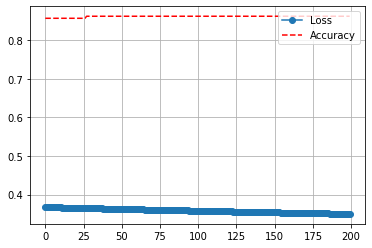

In [156]:
plt.plot(epochs,loss,'o-',Label = 'Loss')
plt.plot(epochs,accuracy,'r--',label = 'Accuracy')
plt.legend(loc='upper right')
plt.grid()